In [12]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')  # Sometimes needed for lemmatization
nltk.download('punkt_tab')  # Explicitly downloading 'punkt_tab' as per the error message


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
# Load dataset
file_path = "/content/all_data.csv"  # Update with actual file path
df = pd.read_csv(file_path, nrows=1000)  # Load first 1000 rows
df.head()


,book_title,Book_series,book_rating,book_author,genre,reviewer_name,review,ID
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",emma,202.\nThat’s the number of times that the word...,1
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),I need a black silk robe and a balcony to wear...,2
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Cait • A Page with a View,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,"3.75 stars\n""Rhys stepped off the stairs and t...",4
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Emily May,I wish so much that I could tell you I loved t...,5


# Text Preprocessing


In [15]:
# Text Cleaning Function
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & digits
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return tokens


In [16]:
# Apply text cleaning
df['cleaned_review'] = df['review'].apply(clean_text)

# Train a Word2Vec Model

In [17]:
# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=df['cleaned_review'], vector_size=100, window=5, min_count=2, workers=4)
word2vec_model.save("text_review_word2vec.model")  # Save the model

In [18]:
# Evaluate Model - Find Similar Words
print(word2vec_model.wv.most_similar('great', topn=10))


[('interesting', 0.999249279499054), ('fictional', 0.9990023374557495), ('storyline', 0.9989529848098755), ('written', 0.9989266991615295), ('romance', 0.9988712668418884), ('beginning', 0.9988556504249573), ('important', 0.9988397359848022), ('absolutely', 0.9988277554512024), ('twist', 0.9987597465515137), ('development', 0.9987099170684814)]


# Visualization

In [19]:
# PCA for Visualization
words = list(word2vec_model.wv.index_to_key[:100])  # Take top 100 words
word_vectors = np.array([word2vec_model.wv[word] for word in words])
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

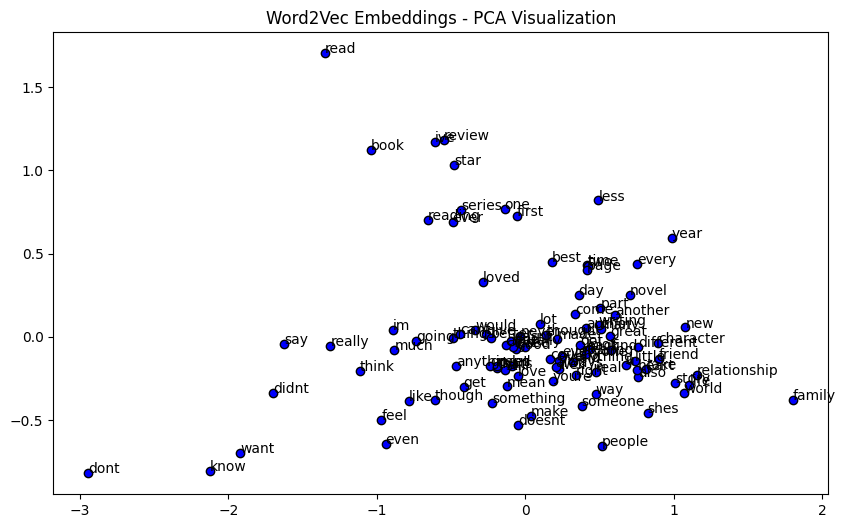

In [20]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', c='blue')
for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.title("Word2Vec Embeddings - PCA Visualization")
plt.show()